Pro. Fernando Amaral  -  [www.eia.ai](https://www.eia.ai)

In [ ]:
#GPU

In [3]:
#!pip install torch

In [1]:
import torch
import matplotlib.pyplot as plt
import torchvision

In [2]:
use_gpu = True if torch.cuda.is_available() else False

total_images = 16

model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub', 'DCGAN', pretrained=True, useGPU=use_gpu)


Downloading: "https://github.com/facebookresearch/pytorch_GAN_zoo/zipball/hub" to C:\Users\estag/.cache\torch\hub\hub.zip
Downloading: "https://dl.fbaipublicfiles.com/gan_zoo/DCGAN_fashionGen-1d67302.pth" to C:\Users\estag/.cache\torch\hub\checkpoints\DCGAN_fashionGen-1d67302.pth
100.0%


Average network found !


In [3]:
torch.cuda.is_available()

True

In [4]:
noise, _ = model.buildNoiseData(total_images)

print(noise)

tensor([[ 1.1743, -0.4508, -1.6269,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0072,  0.4893, -0.4722,  ...,  0.0000,  0.0000,  1.0000],
        [ 1.1934, -0.5307, -0.5925,  ...,  0.0000,  1.0000,  0.0000],
        ...,
        [-0.7047, -0.7411, -0.8623,  ...,  0.0000,  0.0000,  0.0000],
        [-1.7856, -1.9043, -1.1162,  ...,  0.0000,  0.0000,  1.0000],
        [ 1.5577, -0.2285, -0.3664,  ...,  0.0000,  1.0000,  0.0000]],
       device='cuda:0')


In [5]:
with torch.no_grad():
    images = model.test(noise)

In [6]:
images = images - images.min()
images = images / images.max()

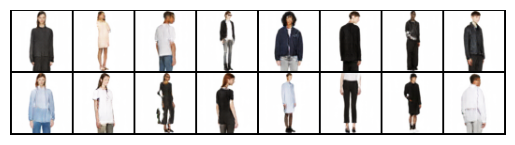

In [7]:
plt.imshow(torchvision.utils.make_grid(images).permute(1, 2, 0).cpu().numpy())
plt.axis('off')
plt.show()